In [13]:
%matplotlib notebook
import numpy as np
import pandas as pd
import netCDF4
import matplotlib.pyplot as plt
from matplotlib import cm

### Open the .nc file

In [14]:
fp = "./data/killua/S1-GUNW-D-R-087-tops-20180505_20180423-161538-20479N_18471N-PP-7187-v2_0_1.nc"
nc = netCDF4.Dataset(fp) # reading the nc file and creating Dataset

NETCDF4


### Read stuff from the .nc file then close it

In [ ]:
lat_array = nc.groups['science'].groups['grids'].groups['data'].variables['latitude'][:].data
lon_array = nc.groups['science'].groups['grids'].groups['data'].variables['longitude'][:].data
image_extent = [np.min(lon_array),np.max(lon_array),np.min(lat_array),np.max(lat_array)]
wavelength = float(nc.groups['science'].groups['radarMetaData'].variables['wavelength'][:].data) * 100 #centimeters

mask_mat = nc.groups['science'].groups['grids'].groups['data'].variables['unwrappedPhase'][:].mask # removes NANs i think

unwrapped_phase_mat = nc.groups['science'].groups['grids'].groups['data'].variables['unwrappedPhase'][:].data

coherence_mat = nc.groups['science'].groups['grids'].groups['data'].variables['coherence'][:].data    
amplitude_mat = nc.groups['science'].groups['grids'].groups['data'].variables['amplitude'][:].data    
cc_mat = amplitude_mat = nc.groups['science'].groups['grids'].groups['data'].variables['connectedComponents'][:].data  
nc.close()

### Filter by coherence

In [ ]:
coherence_threshold = 0.5 # think later if this is good
inds_to_keep = (~mask_mat)* (coherence_mat>coherence_threshold) # ~ basically is the negative of mask_mat i think
mat_shape = inds_to_keep.shape
amp = np.zeros(mat_shape) + np.nan
amp[inds_to_keep] = amplitude_mat[inds_to_keep]
phase = np.zeros(mat_shape) + np.nan
phase[inds_to_keep] = unwrapped_phase_mat[inds_to_keep]
coherence = np.zeros(mat_shape) + np.nan
coherence[inds_to_keep] = coherence_mat[inds_to_keep]
connected_components = np.zeros(mat_shape) -1
connected_components[inds_to_keep] = cc_mat[inds_to_keep]
#change 'surviving' connected components 
cc_uniq=np.unique(connected_components[connected_components>=0])
N_cc = len(cc_uniq)
cc2ind_dict = dict(zip(cc_uniq,np.arange(N_cc)))
cc2ind_dict[-1]=np.nan
connected_components=np.vectorize(cc2ind_dict.__getitem__)(connected_components)

phase_cm_units = wavelength * phase / (2*np.pi)

### Display some graphs

<IPython.core.display.Javascript object>


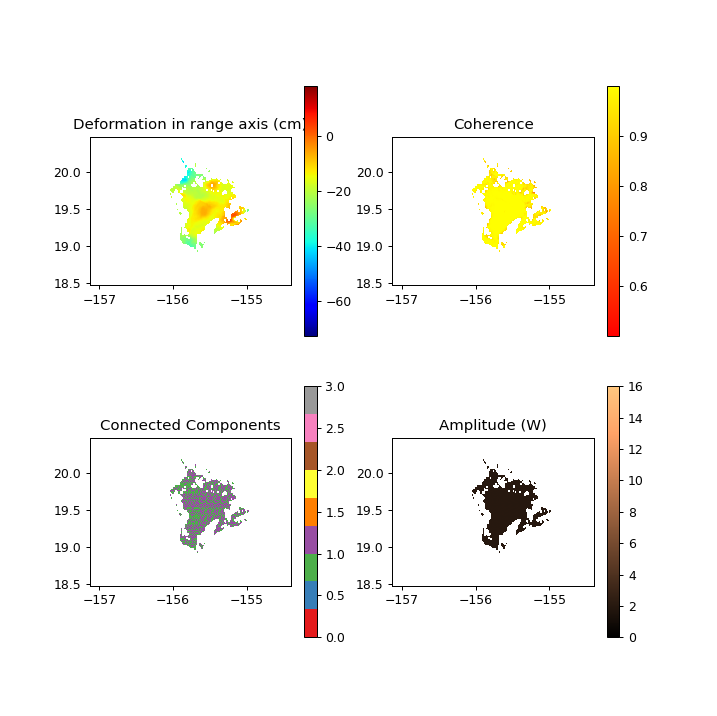

In [17]:
_,ax=plt.subplots(2,2,figsize = (8,8))
ax1=plt.subplot(2,2,1)
#plt.imshow(phase / (2*np.pi),extent = image_extent)
plt.imshow(phase_cm_units,extent = image_extent)
plt.set_cmap('jet')
plt.colorbar()
ax1.set_title('Deformation in range axis (cm)')
# ax1.set_title('Unwrapped Phase / 2pi')

ax2=plt.subplot(2,2,2,sharex=ax1,sharey=ax1)
plt.imshow(coherence,extent = image_extent)
plt.set_cmap('autumn')
ax2.set_title('Coherence')
plt.colorbar()

ax3=plt.subplot(2,2,3,sharex=ax1,sharey=ax1)
plt.imshow(connected_components,extent = image_extent)
#plt.set_cmap(cm.get_cmap('Set1')(N_cc))
plt.set_cmap('Set1')
ax3.set_title('Connected Components')
plt.colorbar()

# ax3=plt.subplot(2,2,3,sharex=ax1,sharey=ax1)
# plt.imshow(np.mod(phase,2*np.pi)/(2*np.pi),extent = image_extent)
# plt.set_cmap('hsv')
# ax3.set_title('Wrapped phase / 2pi')
# cbar = plt.colorbar()
ax4=plt.subplot(2,2,4,sharex=ax1,sharey=ax1)
plt.imshow(amp,extent = image_extent)
plt.set_cmap('copper')
ax4.set_title('Amplitude (W)')
_ = plt.colorbar()
